In [4]:
# import requests  # For API calls
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chisquare
from openai import OpenAI
import json

openai_apikey = os.getenv('OPENAI_APIKEY')
openai_organization = os.getenv('OPENAI_ORGANIZATION')
# Step 1: Collect Samples
# Number of samples
N = 100

client = OpenAI(
    organization=openai_organization,
    api_key=openai_apikey,  
)


In [5]:
def get_api_random_number():
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are an assistant providing a random number between 1 and 6 (both numbers included)"},
            {"role": "assistant", "content": "Give me a random number between 1 and 6 (both numbers included)."},
        ],
        response_format = {
                    #"schema": "http://json-schema.org/draft-07/schema#",
                    "type": "json_schema",
            "json_schema": {
            "name": "DescriptionSchema",  
            "schema": {  
                "type": "object",
                "properties": {
                "RandomNumber": {
                    "type": "number"
                }
                },
                "required": ["RandomNumber"],
                "additionalProperties": False
            }
            }
  
        },
        temperature=1 
    )
    RandomNumber = json.loads(completion.choices[0].message.content)["RandomNumber"]
    return RandomNumber


In [6]:

# Initialize lists to store the random numbers
api_numbers = []
python_numbers = []

# Collect samples using Python's random function
for _ in range(N):
    num_api = get_api_random_number()
    api_numbers.append(num_api)

for _ in range(N):
    num = random.randint(1, 6)
    python_numbers.append(num)

# Step 2: Statistical Testing
# Calculate observed frequencies
api_counts = []
for num in range(1,7):
    i = 0
    for a in api_numbers:
        if num == a:
            i += 1
    api_counts.append(i)
api_counts

python_counts = np.bincount(python_numbers)[1:]

# Expected frequencies assuming uniform distribution
expected_counts = np.full(6, N / 6)

OpenAI (Gpt4o) Random Number Generator:
Chi-square Statistic: 443.00, p-value: 0.0000

Python's Random Number Generator:
Chi-square Statistic: 4.64, p-value: 0.4614


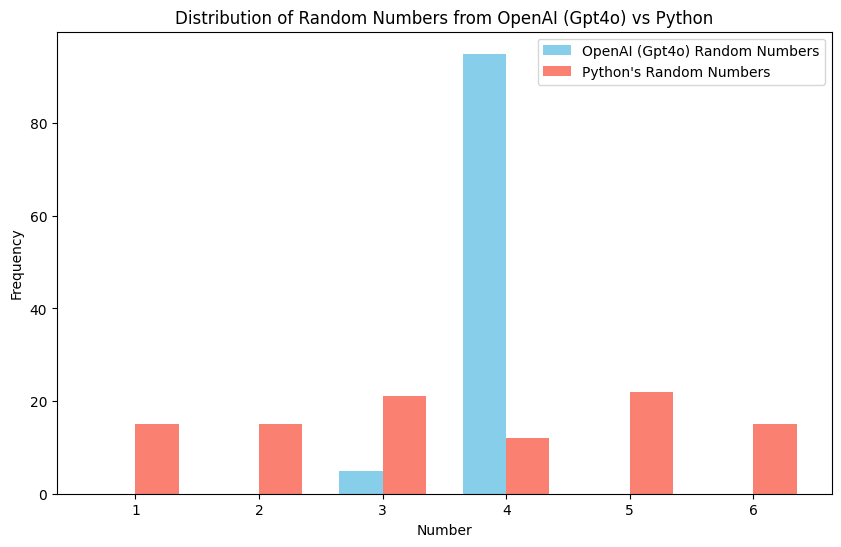

In [7]:
# Chi-square test for the API data
chi2_api, p_api = chisquare(api_counts, f_exp=expected_counts)[:2]

# Chi-square test for Python's random data
chi2_python, p_python = chisquare(python_counts, f_exp=expected_counts)[:2]

print("OpenAI (Gpt4o) Random Number Generator:")
print(f"Chi-square Statistic: {chi2_api:.2f}, p-value: {p_api:.4f}")

print("\nPython's Random Number Generator:")
print(f"Chi-square Statistic: {chi2_python:.2f}, p-value: {p_python:.4f}")

# Step 3: Visualization
# Plotting the distributions
labels = np.arange(1, 7)
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for API data
ax.bar(labels - width/2, api_counts, width, label='OpenAI (Gpt4o) Random Numbers', color='skyblue')

# Bar plot for Python data
ax.bar(labels + width/2, python_counts, width, label="Python's Random Numbers", color='salmon')

# Adding labels and title
ax.set_xlabel('Number')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Random Numbers from OpenAI (Gpt4o) vs Python')
ax.set_xticks(labels)
ax.legend()

# Show the plot
plt.show()
